## The F**** the day of reckoning

**Importing**

In [14]:
import fs.memoryfs as fm

In [2]:
%matplotlib inline
from IPython.core.display import Image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import shutil
#import geobayes_simple as gs

import pymc as pm # PyMC 2
from pymc.Matplot import plot
from pymc import graph as gr
import numpy as np
#import daft
from IPython.core.pylabtools import figsize
figsize(12.5, 10)

Couldn't import dot_parser, loading of dot files will not be possible.


In [3]:
#sys.path.append("C:\Users\Miguel\workspace\Thesis\geobyes")
# as we have our model and pygeomod in different paths, let's change the pygeomod path to the default path.
sys.path.append("C:\Users\Miguel\workspace\pygeomod\pygeomod")
#sys.path.append(r'/home/jni/git/tmp/pygeomod_tmp')
import geogrid
import geomodeller_xml_obj as gxml
reload(gxml)


<module 'geomodeller_xml_obj' from 'C:\Users\Miguel\workspace\pygeomod\pygeomod\geomodeller_xml_obj.pyc'>

## Simplest case: three horizontal layers, with depth unknow
#### Loading pre-made Geomodeller model 

In [4]:
hor_lay = r'..\Geomodeller\Basic_case\3_horizontal_layers\horizontal_layers.xml'
print hor_lay

..\Geomodeller\Basic_case\3_horizontal_layers\horizontal_layers.xml


In [5]:
reload(geogrid)
G1 = geogrid.GeoGrid()

# Using G1, we can read the dimensions of our Murci geomodel
G1.get_dimensions_from_geomodeller_xml_project(hor_lay)

#G1.set_dimensions(dim=(0,23000,0,16000,-8000,1000))
nx = 400
ny = 2
nz = 400
G1.define_regular_grid(nx,ny,nz)

G1.update_from_geomodeller_project(hor_lay)

c_char_p('..\\Geomodeller\\Basic_case\\3_horizontal_layers\\horizontal_layers.xml')


Tha axis here represent the number of cells not the real values of geomodeller

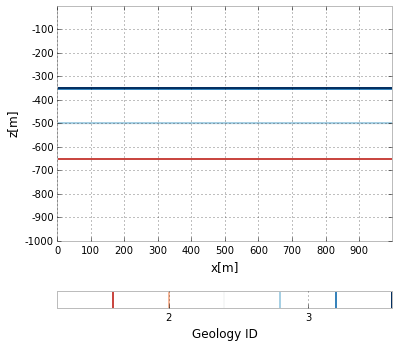

In [6]:
G1.plot_section('y',cell_pos=1,colorbar = True,  cmap='RdBu', figsize=(6,6),interpolation= 'nearest' ,ve = 1, geomod_coord= True, contour = True)

In [7]:
#cd "C:\Users\Miguel\workspace\Thesis\Geomodeller\Basic_case\3_horizontal_layers"
%pwd

u'C:\\Users\\Miguel\\workspace\\Thesis\\Thesis'

In [8]:
hor_lay_1 = r'..\workspace\Thesis\Thesis\Temp3\new1.xml'

####Setting Bayes Model

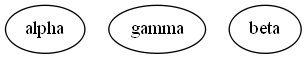

In [9]:
Image("Nice Notebooks\THL_no_thickness.png")

(array(-347.93093728262585), array(-463.3221265661793), array(-602.8159911079662))
[array(-347.93093728262585), array(-463.3221265661793), array(-602.8159911079662), array(-347.93093728262585), array(-463.3221265661793), array(-602.8159911079662)]
['50,-350', '150,-350']
[array(-347.93093728262585), array(-347.93093728262585)]
Coordenates [  50.  150.] [-347.93093728 -347.93093728]
['50,-500', '150,-500']
[array(-463.3221265661793), array(-463.3221265661793)]
Coordenates [  50.  150.] [-463.32212657 -463.32212657]
['50,-650', '150,-650']
[array(-602.8159911079662), array(-602.8159911079662)]
Coordenates [  50.  150.] [-602.81599111 -602.81599111]
['850,-350', '950,-350']
[array(-347.93093728262585), array(-347.93093728262585)]
Coordenates [ 850.  950.] [-347.93093728 -347.93093728]
['850,-500', '950,-500']
[array(-463.3221265661793), array(-463.3221265661793)]
Coordenates [ 850.  950.] [-463.32212657 -463.32212657]
['850,-650', '950,-650']
[array(-602.8159911079662), array(-602.8159911

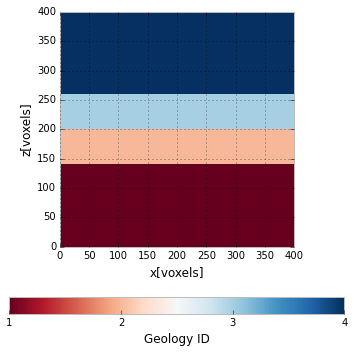

In [27]:
alpha = pm.Normal("alpha", -350, 0.05)#, value= 250)
beta = pm.Normal("beta", -500, 0.0001)#, value=0)
gamma = pm.Normal("gamma", -650, 0.0001)#, value = 0)

@pm.deterministic
def section(alpha = alpha, beta = beta, gamma = gamma):
    print (alpha, beta, gamma)
    samples =  [alpha,beta, gamma,alpha,beta, gamma]
    print samples
    
    hor_lay = r'..\Geomodeller\Basic_case\3_horizontal_layers\horizontal_layers.xml'
    reload(gxml)
    gmod_obj = gxml.GeomodellerClass()
    gmod_obj.load_geomodeller_file(hor_lay)
   

    # Section names:
    section_names = gmod_obj.get_section_names()
   # print "section names",section_names, "\n" 

    # Choose the section we want to use with Positon
    sections = gmod_obj.get_sections()[0]
    #print "Chosen section by position", sections, "\n"

    # Create a dictionary so we can acces the section through the name
    section_dict = gmod_obj.create_sections_dict()
    #print "Chosen section by entry", section_dict['Section1'], "\n"

    # Formation names
    formation_names = gmod_obj.get_formation_names()
    #print "formation names", formation_names, "\n"

    # Get the points of all formation for a given section: Position
    contact_points = gmod_obj.get_formation_point_data(sections) #to extract points you have to choose one of the sections
   # print "Contact points on the chosen section", contact_points, "\n", type(contact_points)

    ## Get the points of all formation for a given section: Dictionary
    contact_points = gmod_obj.get_formation_point_data(section_dict['Section1']) #to extract points you have to choose one of the sections
   # print "Contact points on the chosen section", contact_points, "\n", type(contact_points)

    # Showing contact points
    points = gmod_obj.get_point_coordinates(contact_points)
  #  print "Points coordinates", points
    
    for i, point in enumerate(contact_points):
       # print samples[i]
        gmod_obj.change_formation_point_pos(point, y_coord = [samples[i],samples[i]], print_points = True )
    
    points_changed = gmod_obj.get_point_coordinates(contact_points)
    print "Points coordinates", points_changed
    
    gmod_obj.write_xml("Temp3/test45.xml")
    
    hor_lay_1 = "C:\Users\Miguel\workspace\Thesis\Thesis\Temp3\test45.xlm"
    
    hor_lay = r'..\Geomodeller\Basic_case\3_horizontal_layers\horizontal_layers.xml'
    
    G1 = geogrid.GeoGrid()
    
    G1.get_dimensions_from_geomodeller_xml_project(hor_lay)
    
    nx = 400
    ny = 2
    nz = 400
    G1.define_regular_grid(nx,ny,nz)
    
    print " I am here"
    G1.update_from_geomodeller_project(hor_lay)
    print " I am here2"
    G1.plot_section('y',cell_pos=1,colorbar = True,  cmap='RdBu', figsize=(6,6),interpolation= 'nearest')# ,ve = 1)
    return G1


#MODEL!!
model = pm.Model([alpha, beta, gamma,section])

In [17]:
M = pm.MCMC(model)
M.sample(iter=5, burn = 0)

(array(-350.2990782747421), array(-502.277416191079), array(-631.8710323289323))
[array(-350.2990782747421), array(-502.277416191079), array(-631.8710323289323), array(-350.2990782747421), array(-502.277416191079), array(-631.8710323289323)]
['50,-350', '150,-350']
[array(-350.2990782747421), array(-350.2990782747421)]
Coordenates [  50.  150.] [-350.29907827 -350.29907827]
['50,-500', '150,-500']
[array(-502.277416191079), array(-502.277416191079)]
Coordenates [  50.  150.] [-502.27741619 -502.27741619]
['50,-650', '150,-650']
[array(-631.8710323289323), array(-631.8710323289323)]
Coordenates [  50.  150.] [-631.87103233 -631.87103233]
['850,-350', '950,-350']
[array(-350.2990782747421), array(-350.2990782747421)]
Coordenates [ 850.  950.] [-350.29907827 -350.29907827]
['850,-500', '950,-500']
[array(-502.277416191079), array(-502.277416191079)]
Coordenates [ 850.  950.] [-502.27741619 -502.27741619]
['850,-650', '950,-650']
[array(-631.8710323289323), array(-631.8710323289323)]
Coord

Plotting alpha
Plotting gamma
Plotting beta


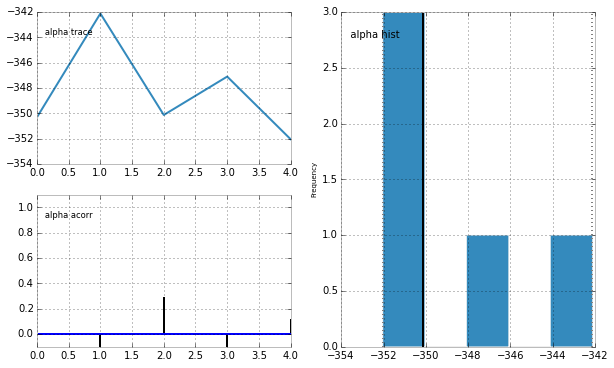

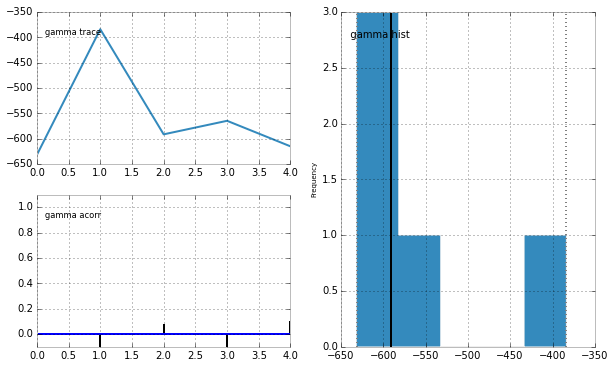

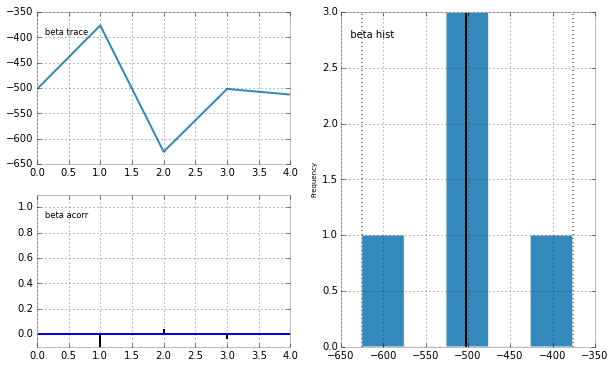

In [18]:
plot(M)

In [19]:
alpha_samples, alpha_samples_all = M.trace('alpha')[-80:], M.trace("alpha")[:]
beta_samples, beta_samples_all = M.trace('beta')[-80:], M.trace("beta")[:]
gamma_samples, gamma_samples_all = M.trace('gamma')[-80:], M.trace('gamma')[:]
section_samples, section_samples_all = M.trace('section')[-80:], M.trace('section')[:]

In [20]:
print M.trace("section")[]

<geogrid.GeoGrid instance at 0x000000001A0E4E08>


OverflowError: cannot convert float infinity to integer

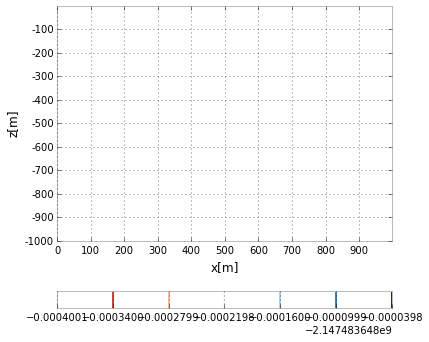

In [20]:

M.trace("section")[4].plot_section('y',cell_pos=1,colorbar = True,  cmap='RdBu', figsize=(6,6),interpolation= 'nearest' ,ve = 1, geomod_coord= True, contour = True)

Plotting alpha
Cannot plot autocorrelation for alpha


ValueError: x has only one data point. bins or range kwarg must be given

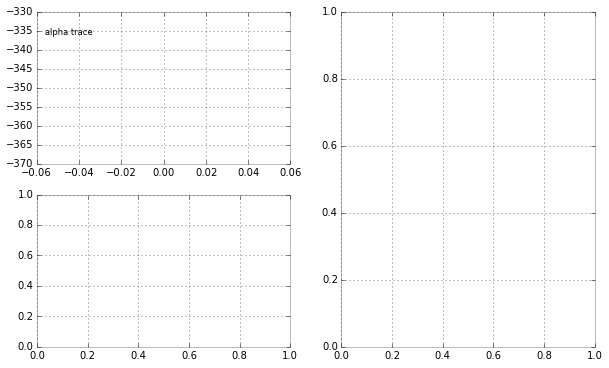

In [16]:
plot(M)

In [73]:
n_samples = 200

alpha_samples, alpha_samples_all = M.trace('alpha')[-n_samples:], M.trace("alpha")[:]
beta_samples, beta_samples_all = M.trace('beta')[-n_samples:], M.trace("beta")[:]
gamma_samples, gamma_samples_all = M.trace('gamma')[-n_samples:], M.trace('gamma')[:]

samples = zip (alpha_samples,beta_samples, gamma_samples,alpha_samples,beta_samples, gamma_samples)
#print samples

## Generating new model in Geomodeller

In [20]:
try:
    shutil.copytree('C:/Users/Miguel/workspace/Thesis/Geomodeller/Basic_case/3_horizontal_layers', 'Temp3/')
except:
    print "The folder is already created"
#r'..\Geomodeller\Basic_case\3_horizontal_layers\

The folder is already created


In [10]:
try:
    shutil.copytree('C:/Users/Miguel/workspace/Thesis/Geomodeller/Basic_case/3_horizontal_layers', 'Temp3/')
except:
    print "The folder is already created"
#r'..\Geomodeller\Basic_case\3_horizontal_layers\

In [11]:
pwd

u'C:\\Users\\Miguel\\workspace\\Thesis\\Thesis'

In [19]:
reload(gxml)
gmod_obj = gxml.GeomodellerClass()
gmod_obj.load_geomodeller_file(hor_lay)
gmod_obj.write_xml("backup\orihor_lay.xml")

Write tree to file backup\orihor_lay.xml


In [20]:
# Section names:
section_names = gmod_obj.get_section_names()
print "section names",section_names, "\n" 

# Choose the section we want to use with Positon
sections = gmod_obj.get_sections()[0]
print "Chosen section by position", sections, "\n"

# Create a dictionary so we can acces the section through the name
section_dict = gmod_obj.create_sections_dict()
print "Chosen section by entry", section_dict['Section1'], "\n"

# Formation names
formation_names = gmod_obj.get_formation_names()
print "formation names", formation_names, "\n"

# Get the points of all formation for a given section: Position
contact_points = gmod_obj.get_formation_point_data(sections) #to extract points you have to choose one of the sections
print "Contact points on the chosen section", contact_points, "\n", type(contact_points)

## Get the points of all formation for a given section: Dictionary
contact_points = gmod_obj.get_formation_point_data(section_dict['Section1']) #to extract points you have to choose one of the sections
print "Contact points on the chosen section", contact_points, "\n", type(contact_points)

# Showing contact points
points = gmod_obj.get_point_coordinates(contact_points)
print "Points coordinates", points

section names ['Section1', 'SurfaceTopography'] 

Chosen section by position <Element '{http://www.geomodeller.com/geo}Section' at 0x2ca7e860> 

Chosen section by entry <Element '{http://www.geomodeller.com/geo}Section' at 0x2ca7e860> 

formation names ['Form1', 'Form2', 'Form3'] 

Contact points on the chosen section [<Element '{http://www.geomodeller.com/geo}Interface' at 0x2ca7ee10>, <Element '{http://www.geomodeller.com/geo}Interface' at 0x2ca7ef60>, <Element '{http://www.geomodeller.com/geo}Interface' at 0x2ca9a0f0>, <Element '{http://www.geomodeller.com/geo}Interface' at 0x2ca9a240>, <Element '{http://www.geomodeller.com/geo}Interface' at 0x2ca9a390>, <Element '{http://www.geomodeller.com/geo}Interface' at 0x2ca9a4e0>] 
<type 'list'>
Contact points on the chosen section [<Element '{http://www.geomodeller.com/geo}Interface' at 0x2ca7ee10>, <Element '{http://www.geomodeller.com/geo}Interface' at 0x2ca7ef60>, <Element '{http://www.geomodeller.com/geo}Interface' at 0x2ca9a0f0>, <Elem

We want to change all points of the three formations. To do so we use the Section 1 that is what we are plotting

In [70]:
for j in range(n_samples):
    for i, point in enumerate(contact_points):
        gmod_obj.change_formation_point_pos(point, y_coord = [samples[0][i],samples[0][i]])
    gmod_obj.write_xml("Temp/new"+ str(j)+".xml")

['50.000000,-353.037876', '150.000000,-353.037876']
['50.000000,-474.861971', '150.000000,-474.861971']
['50.000000,-705.240440', '150.000000,-705.240440']
['850.000000,-353.037876', '950.000000,-353.037876']
['850.000000,-474.861971', '950.000000,-474.861971']
['850.000000,-705.240440', '950.000000,-705.240440']
Write tree to file Temp/new0.xml
['50.000000,-346.574715', '150.000000,-346.574715']
['50.000000,-543.947978', '150.000000,-543.947978']
['50.000000,-630.754424', '150.000000,-630.754424']
['850.000000,-346.574715', '950.000000,-346.574715']
['850.000000,-543.947978', '950.000000,-543.947978']
['850.000000,-630.754424', '950.000000,-630.754424']
Write tree to file Temp/new1.xml
['50.000000,-346.574715', '150.000000,-346.574715']
['50.000000,-543.947978', '150.000000,-543.947978']
['50.000000,-630.754424', '150.000000,-630.754424']
['850.000000,-346.574715', '950.000000,-346.574715']
['850.000000,-543.947978', '950.000000,-543.947978']
['850.000000,-630.754424', '950.000000,-63

In [22]:
# Showing contact points
points_changed = gmod_obj.get_point_coordinates(contact_points)
print "Points coordinates", points_changed


Points coordinates ['Form3 50.000000,-353.037876 150.000000,-353.037876 ', 'Form2 50.000000,-474.861971 150.000000,-474.861971 ', 'Form1 50.000000,-705.240440 150.000000,-705.240440 ', 'Form3 850.000000,-353.037876 950.000000,-353.037876 ', 'Form2 850.000000,-474.861971 950.000000,-474.861971 ', 'Form1 850.000000,-705.240440 950.000000,-705.240440 ']


In [60]:
gmod_obj.write_xml("Temp/new1.xml")

Write tree to file new1.xml


In [ ]:
reload(geogrid)
for j in range(n_samples):
    hor_lay_sam = r'..\Geomodeller\Basic_case\3_horizontal_layers\Temp\new'+str(j)'.xml'

# G1 is the geogrid object, including all functions defined in the geogrid object class
#G2 = geogrid.GeoGrid()
# Using G1, we can read the dimensions of our Murci geomodel
#G2.get_dimensions_from_geomodeller_xml_project(geomodel2)
# Using G1, we can read the dimensions of our Murci geomodel
#G2.get_dimensions_from_geomodeller_xml_project(geomodel2)
#G1.set_dimensions(dim=(0,23000,0,16000,-8000,1000))
#nx = 400
#ny = 2
#nz = 400
#G2.define_regular_grid(nx,ny,nz)

G1.update_from_geomodeller_project(hor_lay_1)

G1.plot_section('y',cell_pos=1,colorbar=False,cmap='RdBu',figsize=(6,6),interpolation= 'nearest' ,ve = 1, alpha = 0.3, contour = True)


In [15]:
try:
    import elementtree.ElementTree as ET
except ImportError:
    try:
        import etree.ElementTree as ET
    except ImportError:
        try:
            import xml.etree.ElementTree as ET
        except ImportError:
            import ElementTree as ET

In [16]:
x = ET.ElementTree(gmod_obj.rootelement)
print x

In [17]:
G1.update_from_geomodeller_project(x)

TypeError: string or integer address expected instead of ElementTree instance

In [14]:
array(x_coord)

array([4, 4])